In [1]:
import pandas as pd
import numpy as np

In [2]:
hr_data = pd.read_csv('hr.csv')

In [3]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
y = hr_data['left']
X = hr_data.drop(['left'], axis = 1)

In [5]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [11]:
X = pd.get_dummies(X, drop_first = True)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10499 entries, 14404 to 2915
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10499 non-null  float64
 1   last_evaluation        10499 non-null  float64
 2   number_project         10499 non-null  int64  
 3   average_montly_hours   10499 non-null  int64  
 4   time_spend_company     10499 non-null  int64  
 5   Work_accident          10499 non-null  int64  
 6   promotion_last_5years  10499 non-null  int64  
 7   sales_RandD            10499 non-null  uint8  
 8   sales_accounting       10499 non-null  uint8  
 9   sales_hr               10499 non-null  uint8  
 10  sales_management       10499 non-null  uint8  
 11  sales_marketing        10499 non-null  uint8  
 12  sales_product_mng      10499 non-null  uint8  
 13  sales_sales            10499 non-null  uint8  
 14  sales_support          10499 non-null  uint8  
 15 

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [78]:
clf = BaggingClassifier(n_estimators = 15, base_estimator = DecisionTreeClassifier(), 
                        random_state = 5, n_jobs = -1, oob_score = True)

In [79]:
clf.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:643: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=15,
                  n_jobs=-1, oob_score=True, random_state=5)

In [97]:
clf.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [83]:
for w in range(10,300,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=5,
                          base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:643: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.981903038384608
************************
For n_estimators = 30
OOB score is 0.9864749023716545
************************
For n_estimators = 50
OOB score is 0.9877131155348129
************************
For n_estimators = 70
OOB score is 0.9882845985331936
************************
For n_estimators = 90
OOB score is 0.9887608343651776
************************
For n_estimators = 110
OOB score is 0.9890465758643681
************************
For n_estimators = 130
OOB score is 0.9887608343651776
************************
For n_estimators = 150
OOB score is 0.9893323173635584
************************
For n_estimators = 170
OOB score is 0.989522811696352
************************
For n_estimators = 190
OOB score is 0.9896180588627488
************************
For n_estimators = 210
OOB score is 0.9896180588627488
************************
For n_estimators = 230
OOB score is 0.9894275645299553
************************
For n_estimators = 250
OOB score is 0.989427564

In [86]:
clf = BaggingClassifier(n_estimators = 210, base_estimator = DecisionTreeClassifier(), 
                        random_state = 5, n_jobs = -1, oob_score = True)

In [88]:
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=210,
                  n_jobs=-1, oob_score=True, random_state=5)

In [89]:
clf.score(X_train, y_train)

1.0

In [90]:
clf.oob_score_

0.9896180588627488

In [91]:
clf.score(X_test, y_test)

0.9913333333333333

In [92]:
clf.estimators_

[DecisionTreeClassifier(random_state=1228472244),
 DecisionTreeClassifier(random_state=1538648557),
 DecisionTreeClassifier(random_state=1291004499),
 DecisionTreeClassifier(random_state=378811896),
 DecisionTreeClassifier(random_state=1715738999),
 DecisionTreeClassifier(random_state=1655026361),
 DecisionTreeClassifier(random_state=1482370082),
 DecisionTreeClassifier(random_state=1085858423),
 DecisionTreeClassifier(random_state=690222301),
 DecisionTreeClassifier(random_state=1739948426),
 DecisionTreeClassifier(random_state=1054112299),
 DecisionTreeClassifier(random_state=1748058408),
 DecisionTreeClassifier(random_state=658601627),
 DecisionTreeClassifier(random_state=1106075865),
 DecisionTreeClassifier(random_state=571025500),
 DecisionTreeClassifier(random_state=1407763178),
 DecisionTreeClassifier(random_state=2006563952),
 DecisionTreeClassifier(random_state=1173011985),
 DecisionTreeClassifier(random_state=1336915361),
 DecisionTreeClassifier(random_state=2079437310),
 Dec

In [93]:
clf.estimators_[1].feature_importances_

array([4.84451371e-01, 1.44871206e-01, 9.98890459e-02, 1.04577888e-01,
       1.40604221e-01, 1.60684347e-03, 7.61931933e-06, 7.43112260e-05,
       2.24362752e-03, 7.78432729e-04, 2.32776769e-04, 5.13298132e-04,
       1.29677799e-03, 1.75197072e-03, 2.87049502e-03, 4.77601964e-03,
       6.50520383e-03, 2.94889134e-03])

In [94]:
imp=[]

for i in clf.estimators_:
    imp.append(i.feature_importances_)

# Average
imp=np.mean(imp,axis=0)

In [95]:
feature_importances = pd.Series(imp, index = X.columns.tolist())

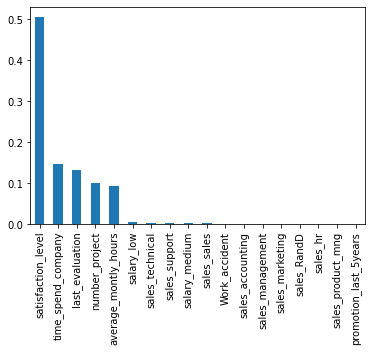

In [96]:
feature_importances.sort_values(ascending = False).plot(kind='bar')